In [1]:
import torch

model_blocks11_attn_attn_IF = torch.load("model_blocks11_attn_IF.pth")[:,0].reshape(32,-1)[:,0:256]

sum_model_blocks11_attn_attn_IF = model_blocks11_attn_attn_IF.sum(dim=0)
print(torch.sum(sum_model_blocks11_attn_attn_IF == 0)/sum_model_blocks11_attn_attn_IF.numel())
print(torch.sum(model_blocks11_attn_attn_IF == 0)/model_blocks11_attn_attn_IF.numel())
print(model_blocks11_attn_attn_IF.shape)
print(model_blocks11_attn_attn_IF.sum(dim=0))





/home/kang_you/anaconda3/envs/SNN/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor(0.5820, device='cuda:0')
tensor(0.8030, device='cuda:0')
torch.Size([32, 256])
tensor([ 0.0000e+00, -9.3132e-10,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         4.6566e-10,  0.0000e+00,  0.0000e+00,  0.0000e+00,  5.7985e-02,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  6.2445e-02,  0.0000e+00,
         4.4604e-03,  0.0000e+00,  4.4604e-03,  4.4604e-03,  4.4604e-03,
         0.0000e+00,  0.0000e+00,  4.4604e-03,  4.4604e-03,  0.0000e+00,
         4.4604e-03,  0.0000e+00,  1.7841e-02,  0.0000e+00,  4.4604e-02,
         0.0000e+00,  4.4604e-03,  0.0000e+00,  4.4604e-03,  0.0000e+00,
         4.4604e-03,  8.9207e-03,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         4.4604e-03,  0.0000e+00,  0.0000e+00,  4.4604e-03,  0.0000e+00,
         4.4604e-03,  4.4604e-03,  4.4

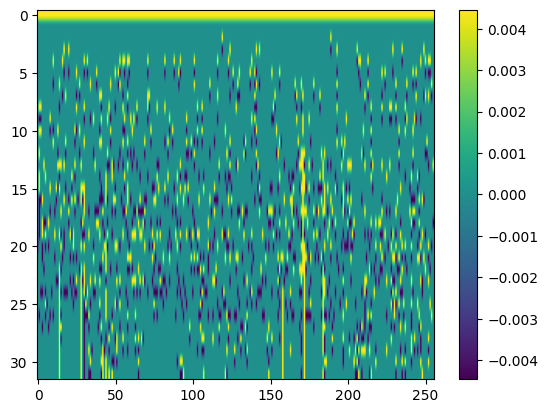

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(model_blocks11_attn_attn_IF.cpu(), cmap='viridis', aspect='auto')
plt.colorbar()  # 添加颜色条
plt.savefig("model_blocks11_attn_attn_IF.png",dpi=1200)

plt.show()

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def visualize_feature_map(feature_path,pic_name):
    feature = torch.load(feature_path)[:,0].reshape(32,-1)[:,2048:2048+16]
    print(feature.shape)
    sum_feature = feature.sum(dim=0)
    thr = feature.max()
    print("thr",thr)
    print(pic_name,":the actual QANN active rate",torch.sum(sum_feature != 0)/sum_feature.numel())
    print(pic_name,"the theoritical minimum of the SNN spiking rate",(torch.sum(torch.abs(sum_feature))/thr)/feature.numel())
    print(pic_name,"the actual SNN spiking rate",torch.sum(feature != 0)/feature.numel())
    plt.imshow(feature.cpu(), cmap='PiYG', aspect='auto')
    plt.colorbar()  # 添加颜色条
    plt.savefig(pic_name,dpi=1200)
    plt.show()
   

visualize_feature_map("/home/kang_you/SpikeZIP_transformer/visualize/model_blocks11_attn_q_IF.pth","model_blocks11_attn_q_IF")
visualize_feature_map("/home/kang_you/SpikeZIP_transformer/visualize/model_blocks11_attn_k_IF.pth","model_blocks11_attn_k_IF")
visualize_feature_map("/home/kang_you/SpikeZIP_transformer/visualize/model_blocks11_attn_v_IF.pth","model_blocks11_attn_v_IF")
visualize_feature_map("/home/kang_you/SpikeZIP_transformer/visualize/model_blocks11_attn_IF.pth","model_blocks11_attn_IF")
visualize_feature_map("/home/kang_you/SpikeZIP_transformer/visualize/model_blocks11_attn_after_attn_IF.pth","model_blocks11_after_attn_IF")
visualize_feature_map("/home/kang_you/SpikeZIP_transformer/visualize/model_blocks11_proj_IF.pth","model_blocks11_proj_IF")
visualize_feature_map("/home/kang_you/SpikeZIP_transformer/visualize/model_blocks11_norm2.pth","model_blocks11_norm2")


torch.Size([32, 75648])
thr tensor(0.2860, device='cuda:0')
model_blocks11_attn_q_IF :the actual QANN active rate tensor(0.9110, device='cuda:0')
model_blocks11_attn_q_IF the theoritical minimum of the SNN spiking rate tensor(0.0726, device='cuda:0')
model_blocks11_attn_q_IF the actual SNN spiking rate tensor(0.5725, device='cuda:0')
torch.Size([32, 75648])
thr tensor(0.5465, device='cuda:0')
model_blocks11_attn_k_IF :the actual QANN active rate tensor(0.7701, device='cuda:0')
model_blocks11_attn_k_IF the theoritical minimum of the SNN spiking rate tensor(0.0429, device='cuda:0')
model_blocks11_attn_k_IF the actual SNN spiking rate tensor(0.3109, device='cuda:0')
torch.Size([32, 75648])
thr tensor(1.0011, device='cuda:0')
model_blocks11_attn_v_IF :the actual QANN active rate tensor(0.7704, device='cuda:0')
model_blocks11_attn_v_IF the theoritical minimum of the SNN spiking rate tensor(0.0441, device='cuda:0')
model_blocks11_attn_v_IF the actual SNN spiking rate tensor(0.4145, device='c

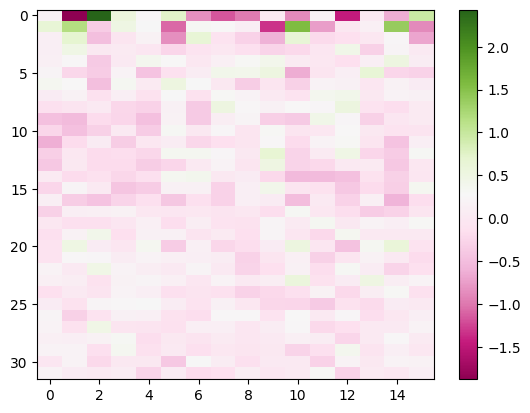

In [15]:
def visualize_ANN_feature_map(feature_path,pic_name):
    feature = torch.load(feature_path)[:,0].reshape(32,-1)[:,2048:2048+16]
    # feature[feature>0.2341] = 0.2341
    # feature[feature<-0.2341] = -0.2341
    plt.imshow(feature.cpu(), cmap='PiYG', aspect='auto')
    plt.colorbar()  # 添加颜色条
    plt.savefig(pic_name,dpi=1200)
    plt.show()

visualize_ANN_feature_map("/home/kang_you/SpikeZIP_transformer/visualize/model_blocks11_norm2_input.pth","model_blocks11_norm2_input")



In [ ]:
def compare_ANN_feature_map(ANN_feature_path,pic_name):
    
    
    
    